## Lecture_3 : Global Vectors for word representation

### - Finish word2vec
![image.png](img/3-1.png)

"I like deep learning and NLP"라는 문장의 word2vec은..  
V vector에 deep이라는 단어가 center word로 주어졌을 때, 'I'가 나올 조건부 확률을 계산, 계산 방법은 단어벡터들이 모여있는 행렬에서 해당 단어의 벡터를 꺼내 내적한 후 exponential을 취함. 분모에는 문장의 모든 벡터의 합 
- 위와 같은 과정을 반복하며 window를 이동시켜 벡터를 구함

#### Q(from audience) n A(from ta)  
Q. How do we choose the dimensionality?  
A. we'll get to that once we look at the evaluation of these word vectors  
Q. how do we start and how much does it matter?  
A. most of the objective function in this lecture are not convex and you will learn how to 
trick on circumvent(우회하다) very bad local optima, but it turns out in practice, ** as long as you initialize with small random number, it does not tend to be a problem **

![image.png](img/3-2.png)
- 분자의 경우, 간단하고 빠르게 계산이 가능
- 분모의 경우, window를 옮기며 매번 계산을 할 경우, 계산량이 많아지고, 심지어 이 부분을 기계에게 학습시킬 수도 없음(영상에서 deep learning  이라는 단어의 경우, zebra나 aadrdvar의 단어들과는 전혀 co-occur하지 않음. 
- 대부분의 단어들은 대부분의 다른 단어들과 함께 등장하지 않음(don't actually appear with most other words) -> it's pretty sparse

skip-gram의 핵심 아이디어는 실제 쌍에 대해 몇 번의 이진 로지스틱 회귀를 함으로써  
최적화 하려는 아이디어를 유지할 수 있게 함  

![image.png](img/3-3.png)

$P(w) = U(w)^{3/4}/Z$



- skip gram model(시그마는 시그모이드 함수를 뜻함)
- first term : log식은 두 center words와 outside word의 co-occur에 대한 log probability를 나타냄. 나타날 수 있는 실제 단어의 확률은 높이고, centerword의 주변의 랜덤 단어들을 낮춤
- second term : essentialy try to minimize their probability of co-occurring
- 목적 함수를 사용함으로써 실제로는 center words와 함께 등장하지 않는 zebra 같은 단어의 확률을 줄임
- $J_t(\theta)$가 뜻하는 것은, 우리 모델에서 우리가 사용할 모든 변수들에 대한 파라미터, 여기서는 모든 u vector 과 모든 v vector  
- J is just our cost function and T is at the Tth time step at the window 
목적함수를 최적화 시키는 것이 목적이나, 한번에 모든 corpus를 update하는 것은 하지 않을 것 -> cuz that doesn't work usually verywell  

CBOW의 메인 아이디어 : 
- skip gram  model에서 center words를 중심으로 surrounding words를 예측했던 것 과는 다르게, surrounding word를 통해 center words를 예측함. 

### Summarize of word2vec
- 기본적으로, 말뭉치 안의 각각의 단어들을 기준으로, 주변 단어(surrounding words)를 예측함.
- 동시에 나오는 단어들을 잡는다. 이 단어들이 다른 단어와 얼마나 자주 등장하는가?
- 'deep and learning' -> update 이런 식으로 반복하여 한 window씩 하나씩
- 한 번에 모든 documentation을 할 수 없는가? - word2vec 이전에 나온 생각.
- (이 뒤에 나온 부분 이해 불가)
- Syntactic sugar의 정의 is a computer science term that refers to syntax within a programming language that is designed to make things easier to read or to express. It makes the language "sweeter" for humans to use: things can be expressed more clearly, more concisely, or in an alternative style that some may prefer. -> 프로그래밍적 편의성 정도

#### Example : Window based co-occurence matrix
- window의 길이는 편의상 1, 하지만 대부분은 5 - 10
-  대칭이라고 가정. 

![image.png](img/3-4.png)

- 처음 I를 기준으로 I 옆에 나와있는 단어들을 count, like의 경우 2, enjoy의 경우 1
- like를 기준으로 like 옆에 나와있는 단어들 count. 
- 반복하여 위 표를 만듬. 
- enjoy와 like의 경우, 그 의미는 비슷하지만 다르게 count됨으로써 결과적으로 단어 사전이 매우 커지게 만듬 -> 차원수가 커짐
- 차원수를 어떻게 줄일까? -> ** SVD ** 

#### SVD(Singular Value Decomposition)이란?
- 고유값 분해(eigendecompostion)처럼 행렬을 대각화 하는 방법
- 행렬이 정방행렬이 아니어도 모든 m * n 에 대해 적용이 가능함. 
(고유값, 고유벡터에서 다룬 내용의 경우, 정방행렬에 대해서만 가능)  
SVD  세부설명 링크 : http://darkpgmr.tistory.com/106

In [8]:
#simple SVD word vectors in python
import numpy as np
la = np.linalg
words = ["I", "like", "enjoy", "deep", "learning", "NLP", "flying", "."]
X = np.array([[0, 2, 1, 0, 0, 0, 0, 0],
                 [2, 0, 0, 1, 0, 1, 0, 0],
                 [1, 0, 0, 0, 0, 0, 1, 0],
                 [0, 1, 0, 0, 1, 0, 0, 0],
                 [0, 0, 0, 1, 0, 0, 0, 1],
                 [0, 1, 0, 0, 0, 0, 0, 1],
                 [0, 0, 1, 0, 0, 0, 0, 1],
                 [0, 0, 0, 0, 1, 1, 1, 0]])
U, s, Vh = la.svd(X, full_matrices = False)

In [12]:
import matplotlib.pyplot as plt

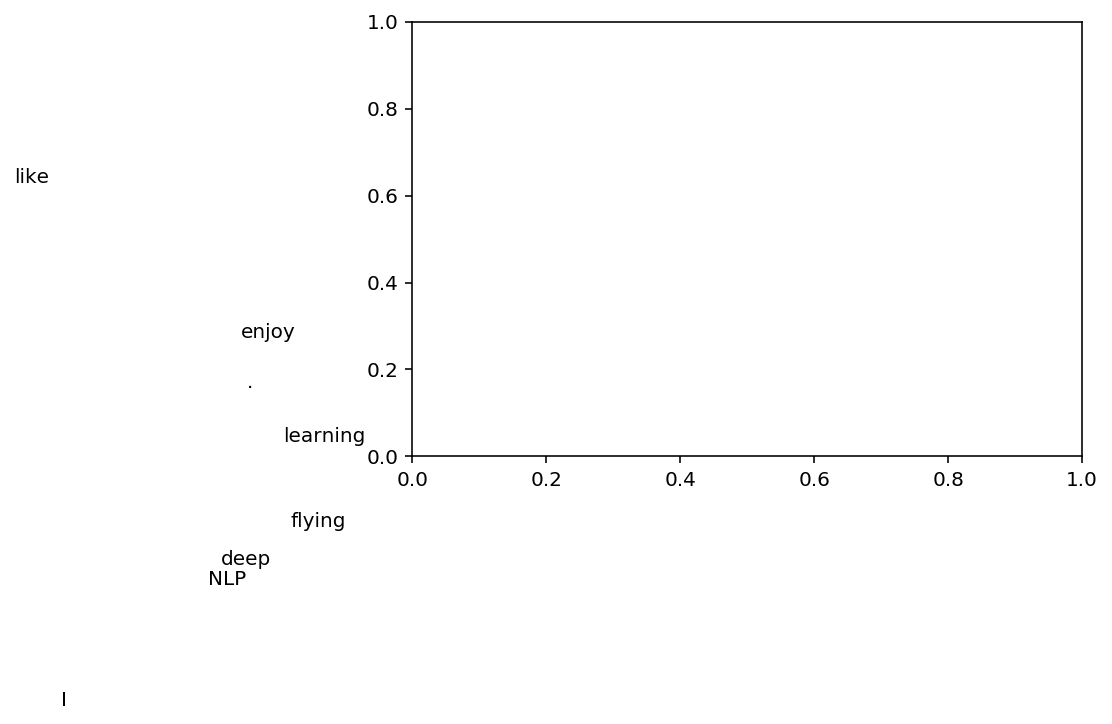

In [13]:
for i in range(len(words)) :
    plt.text(U[i, 0], U[i, 1], words[i])

Q : window is alway symmetric?  
A : no.we can evaluate asymmetric windows.  
Q : Does language matters?  
A : it works for most of languages.  

#### problems with SVD
- 큰 형태의 행렬을 가질 경우 문제가 발생할 수 있음. 
(down stream deep learning method는 추측컨데, SVD를 기반으로 하는 다른 딥러닝 방법들을 말하는 듯)

 ### - What does word2vec capture?

### - How could we capture this essence more effectively?

### - how can we analyse word vectors?